## Adult Income Classification

Problem Statement: Predict whether income exceeds $50K/yr based on census data. Also
known as the "Census Income" dataset

In [30]:
# Importing Required Librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline

In [2]:
# Importing dataset
import pandas as pd
df= pd.read_csv('adult.csv')
df

age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loss  hours-per-week         country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

       salary  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [3]:
# Making Profile report of the dataset 
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
# Information of the data ,we found some of the columns are have object data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# Finding Null values in the data set
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

### Finding Unique values for all the columns

In [6]:
# Finding Unique values of Workclass
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [7]:
df['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [8]:
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [9]:
df.columns = df.columns.str.replace('marital-status', 'martial')

In [10]:
df['martial'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [11]:
df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [12]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [13]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [14]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [15]:
df['country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [16]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

## Performing Lable Encoding for the columns which are having Object types

In [17]:
df['salary'] = df.salary.map({' <=50K':0, ' >50K': 1})

df['sex'] = df.sex.map({' Female':0, ' Male':1})

df['race']=df.race.map({' White':0,' Black':1, 
                                    ' Asian-Pac-Islander':2, ' Amer-Indian-Eskimo':3,' Other':4})


df['martial'] =df.martial.map({' Widowed':0, ' Divorced':1, ' Separated':2,
                                                 ' Never-married':3, ' Married-civ-spouse':4,
                                                  ' Married-spouse-absent':5,  ' Married-AF-spouse':6})

df['relationship']=df.relationship.map({' Not-in-family':0, ' Unmarried':0, 
                                           ' Own-child':0, ' Other-relative':0, 
                                           ' Husband':1, ' Wife':1})

df['workclass']=df.workclass.map({' ?':0, ' State-gov':1, ' Self-emp-not-inc':2, ' Private':3, 
                                        ' Federal-gov':4, ' Local-gov': 5, ' Self-emp-inc': 6,
                                        ' Without-pay':7, ' Never-worked':8})

df['occupation']=df.occupation.map({' Adm-clerical':1, ' Exec-managerial':2, ' Handlers-cleaners':3,
       ' Prof-specialty':4, ' Other-service':5, ' Sales':6, ' Craft-repair':7,
       ' Transport-moving':8, ' Farming-fishing':9, ' Machine-op-inspct':10,
       ' Tech-support':11, ' ?':12, ' Protective-serv':13, ' Armed-Forces':14,
       ' Priv-house-serv':15})

df['country']=df.country.map({' United-States':1, ' Cuba':2, ' Jamaica':3, ' India':4, ' ?':5, ' Mexico':6,
       ' South':7, ' Puerto-Rico':8, ' Honduras':9, ' England':10, ' Canada':11,
       ' Germany':12, ' Iran':13, ' Philippines':14, ' Italy':15, ' Poland':16,
       ' Columbia':17, ' Cambodia':18, ' Thailand':19, ' Ecuador':20, ' Laos':21,
       ' Taiwan':22, ' Haiti':23, ' Portugal':24, ' Dominican-Republic':25,
       ' El-Salvador':26, ' France':27, ' Guatemala':28, ' China':29, ' Japan':30,
       ' Yugoslavia':31, ' Peru':32, ' Outlying-US(Guam-USVI-etc)':33, ' Scotland':34,
       ' Trinadad&Tobago':35, ' Greece':36, ' Nicaragua':37, ' Vietnam':38, ' Hong':39,
       ' Ireland':40, ' Hungary':41, ' Holand-Netherlands':42})

df['education']=df.education.map({' Bachelors':1, ' HS-grad':2, ' 11th':3, ' Masters':4, ' 9th':5,
       ' Some-college':6, ' Assoc-acdm':7, ' Assoc-voc':8, ' 7th-8th':9,
       ' Doctorate':10, ' Prof-school':11, ' 5th-6th':12, ' 10th':13, ' 1st-4th':14,
       ' Preschool':15, ' 12th':16})


In [18]:
df.head()

age  workclass  fnlwgt  education  education-num  martial  occupation  \
0   39          1   77516          1             13        3           1   
1   50          2   83311          1             13        4           2   
2   38          3  215646          2              9        1           3   
3   53          3  234721          3              7        4           3   
4   28          3  338409          1             13        4           4   

   relationship  race  sex  capital-gain  capital-loss  hours-per-week  \
0             0     0    1          2174             0              40   
1             1     0    1             0             0              13   
2             0     0    1             0             0              40   
3             1     1    1             0             0              40   
4             1     1    0             0             0              40   

   country  salary  
0        1       0  
1        1       0  
2        1       0  
3        1       0  
4        2       0

In [19]:
# Finding Missing Values in the data set
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
martial           0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [20]:
# Finding Unique values for capital_gain
df['capital-gain'].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

In [21]:
# Finding Unique values for capital_loss
df['capital-loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411], dtype=int64)

In [22]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'martial',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [23]:
# Information of the data set finaly we changed the data types of the columns  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education-num   32561 non-null  int64
 5   martial         32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   sex             32561 non-null  int64
 10  capital-gain    32561 non-null  int64
 11  capital-loss    32561 non-null  int64
 12  hours-per-week  32561 non-null  int64
 13  country         32561 non-null  int64
 14  salary          32561 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [24]:
# Describing the data to examine the stats values
df.describe()

age     workclass        fnlwgt     education  education-num  \
count  32561.000000  32561.000000  3.256100e+04  32561.000000   32561.000000   
mean      38.581647      2.936734  1.897784e+05      4.424465      10.080679   
std       13.640433      1.161177  1.055500e+05      3.453582       2.572720   
min       17.000000      0.000000  1.228500e+04      1.000000       1.000000   
25%       28.000000      3.000000  1.178270e+05      2.000000       9.000000   
50%       37.000000      3.000000  1.783560e+05      3.000000      10.000000   
75%       48.000000      3.000000  2.370510e+05      6.000000      12.000000   
max       90.000000      8.000000  1.484705e+06     16.000000      16.000000   

            martial    occupation  relationship          race           sex  \
count  32561.000000  32561.000000  32561.000000  32561.000000  32561.000000   
mean       3.091858      5.666411      0.453334      0.221707      0.669205   
std        1.166620      3.386119      0.497825      0.627348      0.470506   
min        0.000000      1.000000      0.000000      0.000000      0.000000   
25%        3.000000      3.000000      0.000000      0.000000      0.000000   
50%        3.000000      5.000000      0.000000      0.000000      1.000000   
75%        4.000000      8.000000      1.000000      0.000000      1.000000   
max        6.000000     15.000000      1.000000      4.000000      1.000000   

       capital-gain  capital-loss  hours-per-week       country        salary  
count  32561.000000  32561.000000    32561.000000  32561.000000  32561.000000  
mean    1077.648844     87.303830       40.437456      2.290317      0.240810  
std     7385.292085    402.960219       12.347429      5.045373      0.427581  
min        0.000000      0.000000        1.000000      1.000000      0.000000  
25%        0.000000      0.000000       40.000000      1.000000      0.000000  
50%        0.000000      0.000000       40.000000      1.000000      0.000000  
75%        0.000000      0.000000       45.000000      1.000000      0.000000  
max    99999.000000   4356.000000       99.000000     42.000000      1.000000

In [25]:
df.head(1)

age  workclass  fnlwgt  education  education-num  martial  occupation  \
0   39          1   77516          1             13        3           1   

   relationship  race  sex  capital-gain  capital-loss  hours-per-week  \
0             0     0    1          2174             0              40   

   country  salary  
0        1       0

## Observation- Our dependent variable classes has balance dataset


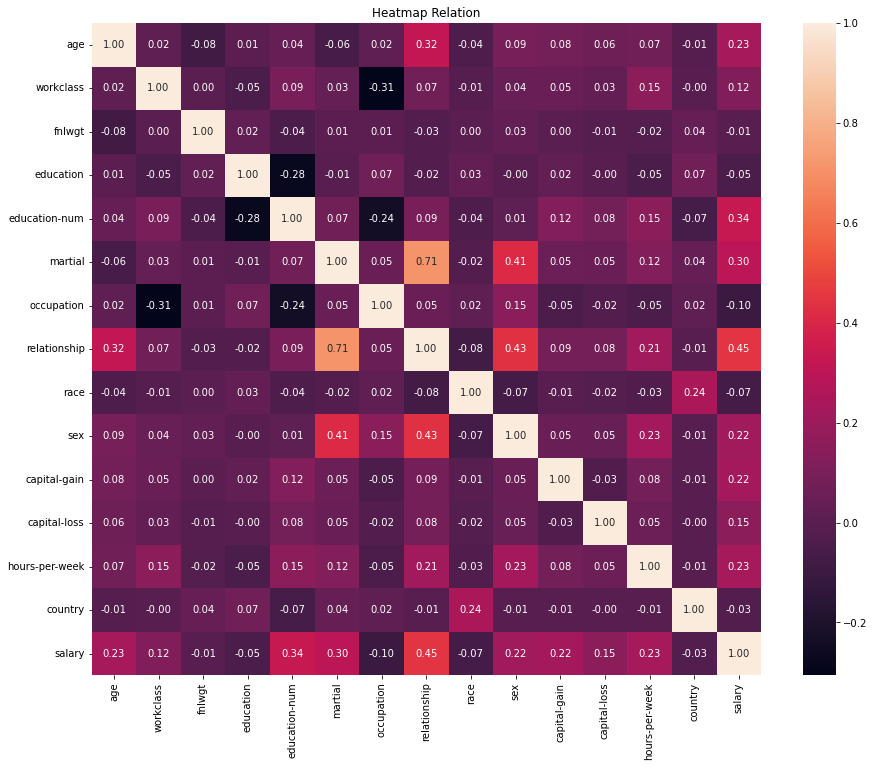

In [32]:
# Corelation plot for all dependent features
plt.figure(figsize=(15, 12))

plt.title("Heatmap Relation")

sns.heatmap(df.corr(), annot=True, fmt='.2f');


### Observation1 - As we can see in this heatmap, The lighter color shows the higher cor-relation betweem two variables and the darker color has less relation ship.

### Observation1 - Few Features are showing _ve corelation


## Splitting Independent and Dependent data

In [33]:
x=df.iloc[:,:-1]
y=df['salary']

## Finding Outliers

C:\Users\Dhvani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dhvani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dhvani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dhvani\anaconda3\li

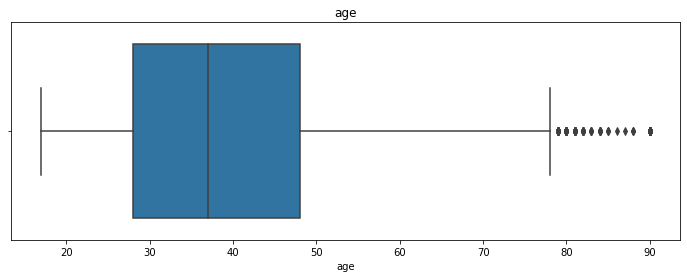

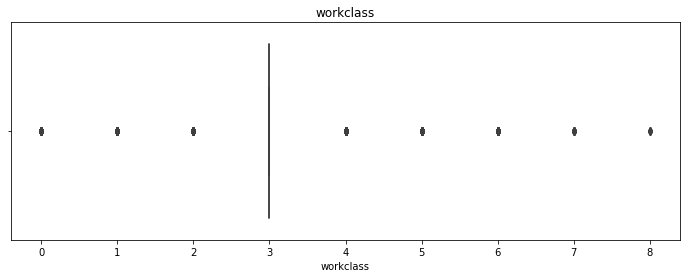

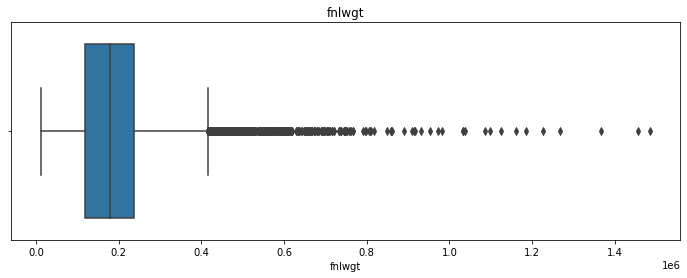

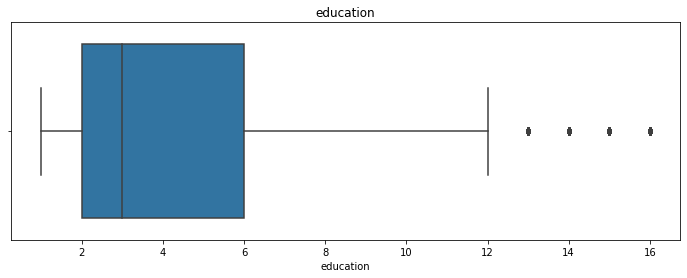

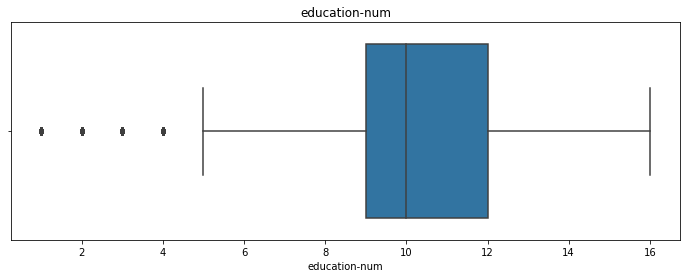

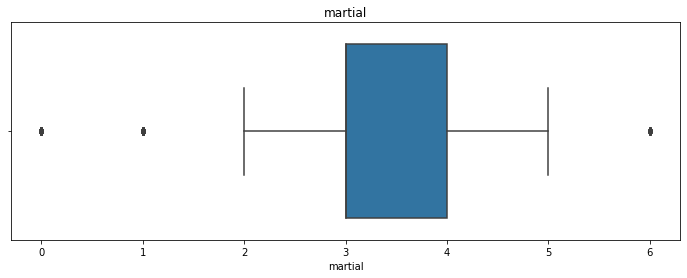

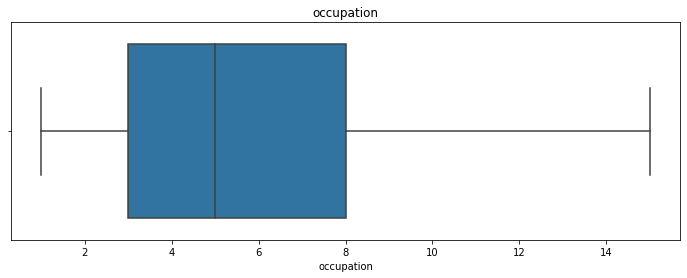

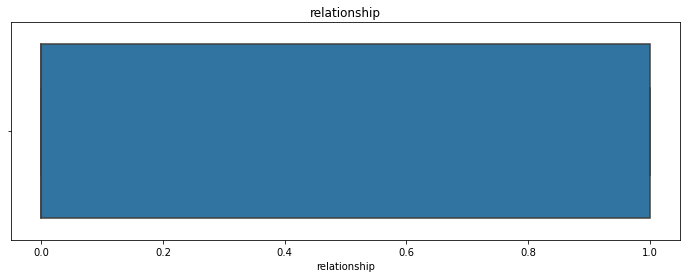

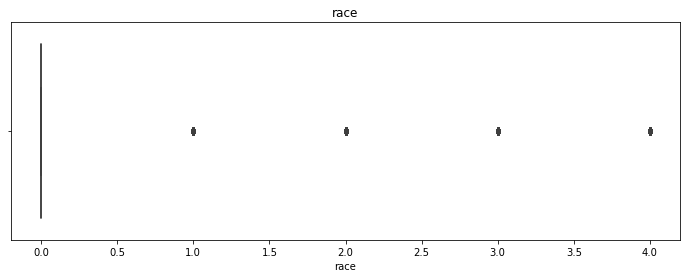

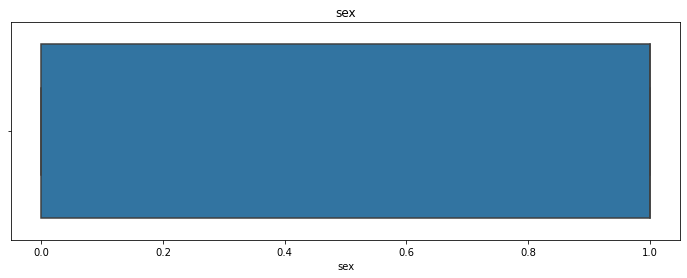

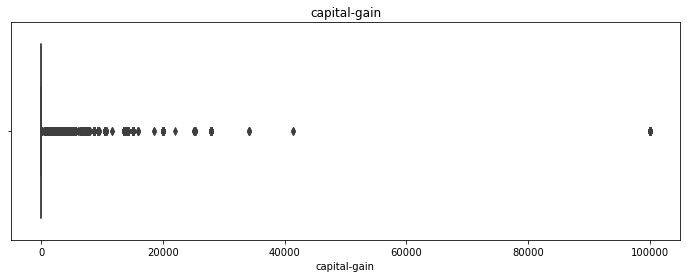

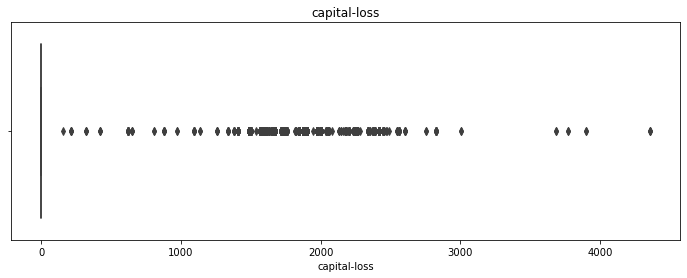

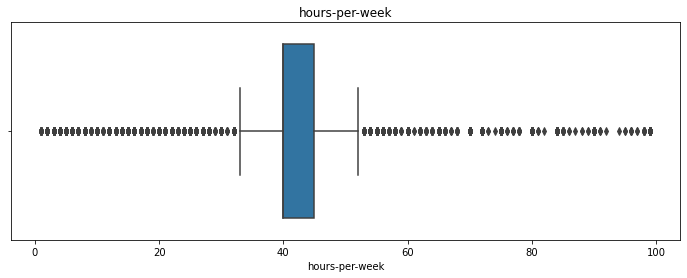

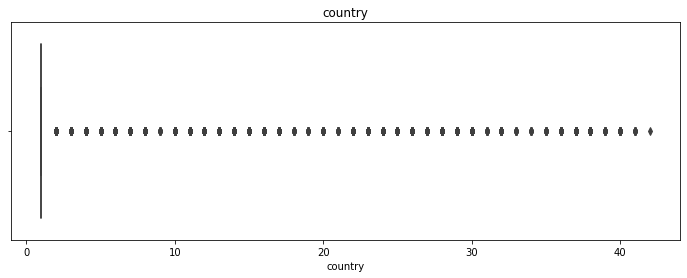

In [34]:
x.columns
for col in x.columns:
    plt.figure(figsize=(12,4))
    sns.boxplot(x[col])
    plt.title(col)

### Observation- Outliers are there in our data

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

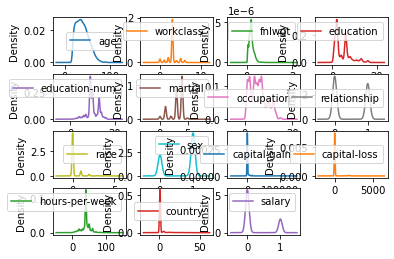

In [42]:

df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False)

## Model Creation (XG Boost)

In [43]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=0)

In [45]:
# as the datapoints differ a lot in magnitude, we'll scale them
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(x)

In [46]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(scaled_data,y,test_size=0.3,random_state=42)

In [47]:
# fit model no training data
model = XGBClassifier()
model.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [48]:
# cheking training accuracy
y_pred = model.predict(train_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(train_y,predictions)
accuracy

0.9090909090909091

In [49]:
# cheking initial test accuracy
y_pred = model.predict(test_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(test_y,predictions)
accuracy

0.8696898351929573

In [50]:
# Now to increae the accuracy of the model, we'll do hyperparameter tuning using grid search
from sklearn.model_selection import GridSearchCV
param_grid={
   
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}

In [51]:
# Grid Searchcv
grid= GridSearchCV(XGBClassifier(),param_grid, verbose=3)

In [52]:
grid.fit(train_x,train_y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END  learning_rate=1, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=1, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=

C:\Users\Dhvani\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
400 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
19 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dhvani\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dhvani\anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\Dhvani\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\Dhvani\anaconda3\lib\site-packages\xgboost\core.py", line

XGBoostError: [17:00:19] C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:604: Invalid parameter " learning_rate" contains whitespace.

In [53]:
# To  find the parameters givingmaximum accuracy
grid.best_params_

{' learning_rate': 1, 'max_depth': 3, 'n_estimators': 10}

In [54]:
# Create new model using the same parameters
new_model=XGBClassifier(learning_rate= 1, max_depth= 3, n_estimators= 10)
new_model.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', learning_rate=1,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [55]:
y_pred_new = new_model.predict(test_x)
predictions_new = [round(value) for value in y_pred_new]
accuracy_new = accuracy_score(test_y,predictions_new)
accuracy_new

0.8664141672637936

In [56]:
def evaluation(model):
    from sklearn.metrics import classification_report
    
    # This function gives provides verious evaluation metrics for the input model
    
    y_pred = model.predict(test_x)
    
    print(classification_report(test_y, y_pred_new, target_names = ['Under 50k', 'Over 50k']))
    print('Training Set Accuracy Score: {:.2f}'.format(model.score(train_x, train_y)))
    print('Testing Set Accuracy Score: {:.2f}'.format(model.score(test_x,test_y)))

In [57]:
evaluation(new_model)

              precision    recall  f1-score   support

   Under 50k       0.89      0.94      0.92      7455
    Over 50k       0.77      0.62      0.69      2314

    accuracy                           0.87      9769
   macro avg       0.83      0.78      0.80      9769
weighted avg       0.86      0.87      0.86      9769

Training Set Accuracy Score: 0.87
Testing Set Accuracy Score: 0.87


In [58]:
def confusion(model):
    
    # Creats a confusion matrix/heatmap for the logistic regression models predicted values
    from sklearn.metrics import confusion_matrix
    
    y_pred = model.predict(test_x)
    confusion_mc = confusion_matrix(test_y, y_pred_new)
    df_cm = pd.DataFrame(confusion_mc)

    plt.figure(figsize=(5.5,4))
    sns.heatmap(df_cm, annot=True)
    plt.title('Model Accuracy:{:.3f}'.format(model.score(test_x, test_y)))

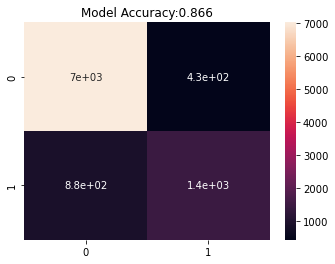

In [59]:
confusion(new_model)

## Model Creation (CATBoost)

In [61]:
from catboost import CatBoostClassifier

In [62]:
scores1 = []
scores2 = []
scores3 = []
cat = CatBoostClassifier(iterations=50, depth=6, verbose=False) 
cat.fit(train_x, train_y)
scores1.append(cat.score(test_x, test_y))

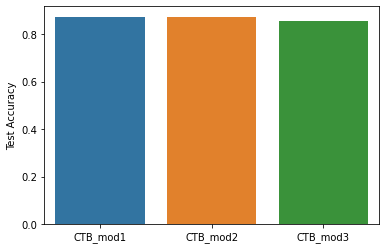

In [66]:
cat = CatBoostClassifier(iterations=100, depth=8, verbose=False)
cat.fit(train_x, train_y)
scores2.append(cat.score(test_x, test_y))

cat = CatBoostClassifier(iterations=200, depth=12, verbose=False)
cat.fit(train_x, train_y)
scores3.append(cat.score(test_x, test_y))
    
sns.barplot(data=[scores1, scores2, scores3])
plt.xticks([0,1,2], ['CTB_mod1', 'CTB_mod2', 'CTB_mod3'])
plt.ylabel('Test Accuracy'); plt.show()

In [65]:
print(scores1)
print(scores2)
print(scores3)

[0.8716347630258983]
[0.874091513972771]
[0.8583273620636708]


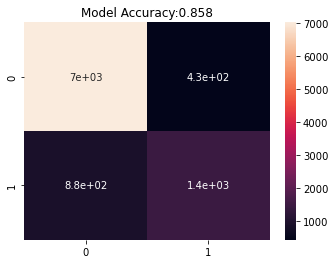

In [67]:
confusion(cat)